In [4]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the time library and datetime module from the datetime library
import time
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | leningradskiy
Processing Record 4 of Set 1 | yulara
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | barda
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | mugumu
Processing Record 13 of Set 1 | pushkinskiye gory
Processing Record 14 of Set 1 | eyl
Processing Record 15 of Set 1 | nome
Processing Record 16 of Set 1 | george
Processing Record 17 of Set 1 | trairi
Processing Record 18 of Set 1 | richards bay
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | aripuana
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | ngaoundere
Processing Record 23 of Set 1 | dikso

Processing Record 38 of Set 4 | shelburne
Processing Record 39 of Set 4 | cockburn town
Processing Record 40 of Set 4 | barcelona
Processing Record 41 of Set 4 | lolua
City not found. Skipping...
Processing Record 42 of Set 4 | khonsa
Processing Record 43 of Set 4 | faya
Processing Record 44 of Set 4 | dingle
Processing Record 45 of Set 4 | rungata
City not found. Skipping...
Processing Record 46 of Set 4 | yellowknife
Processing Record 47 of Set 4 | mahibadhoo
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | nishihara
Processing Record 50 of Set 4 | chagda
City not found. Skipping...
Processing Record 1 of Set 5 | araouane
Processing Record 2 of Set 5 | mkuranga
Processing Record 3 of Set 5 | bara
Processing Record 4 of Set 5 | kununurra
Processing Record 5 of Set 5 | amalapuram
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | shimoda
Processing Record 8 of Set 5 | labrea
Processing Record 9 of Set 5 |

Processing Record 27 of Set 8 | ponta delgada
Processing Record 28 of Set 8 | kaeo
Processing Record 29 of Set 8 | potgietersrus
City not found. Skipping...
Processing Record 30 of Set 8 | udarnyy
Processing Record 31 of Set 8 | bambanglipuro
Processing Record 32 of Set 8 | manggar
Processing Record 33 of Set 8 | arona
Processing Record 34 of Set 8 | dabhol
Processing Record 35 of Set 8 | abnub
Processing Record 36 of Set 8 | westport
Processing Record 37 of Set 8 | aljezur
Processing Record 38 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 8 | batagay
Processing Record 40 of Set 8 | sambava
Processing Record 41 of Set 8 | san cristobal
Processing Record 42 of Set 8 | shamary
Processing Record 43 of Set 8 | halalo
City not found. Skipping...
Processing Record 44 of Set 8 | grindavik
Processing Record 45 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 46 of Set 8 | saint-prosper
Processing Record 47 of Set 8 | ordu
Processing Record 48

Processing Record 9 of Set 12 | luanda
Processing Record 10 of Set 12 | constitucion
Processing Record 11 of Set 12 | khandagayty
Processing Record 12 of Set 12 | micheweni
Processing Record 13 of Set 12 | bada
Processing Record 14 of Set 12 | mtwara
Processing Record 15 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 16 of Set 12 | sayyan
Processing Record 17 of Set 12 | neiafu
Processing Record 18 of Set 12 | algiers
Processing Record 19 of Set 12 | poquoson
Processing Record 20 of Set 12 | tocopilla
Processing Record 21 of Set 12 | nawa
Processing Record 22 of Set 12 | hihifo
City not found. Skipping...
Processing Record 23 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 24 of Set 12 | khani
Processing Record 25 of Set 12 | oranjemund
Processing Record 26 of Set 12 | biltine
Processing Record 27 of Set 12 | buala
Processing Record 28 of Set 12 | simao
Processing Record 29 of Set 12 | manaus
Processing Record 30 of Set 12 | ust-nera
Process

In [10]:
# Convert the array of dictionaries to a Pandas Dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.17,61,59,4.29,PF,2022-01-30 17:34:24
1,Atuona,-9.8000,-139.0333,77.22,79,10,13.20,PF,2022-01-30 17:35:18
2,Leningradskiy,69.3833,178.4167,-8.90,93,100,0.51,RU,2022-01-30 17:35:18
3,Yulara,-25.2406,130.9889,73.24,100,40,12.66,AU,2022-01-30 17:34:33
4,Punta Arenas,-53.1500,-70.9167,51.91,46,75,28.77,CL,2022-01-30 17:35:19
5,Cabo San Lucas,22.8909,-109.9124,74.52,70,20,3.00,MX,2022-01-30 17:35:19
6,Norman Wells,65.2820,-126.8329,-34.56,61,75,0.00,CA,2022-01-30 17:35:19
7,Barda,40.3744,47.1267,41.68,43,86,1.16,AZ,2022-01-30 17:35:19
8,Tuktoyaktuk,69.4541,-133.0374,-2.20,78,100,18.41,CA,2022-01-30 17:34:34
9,Hobart,-42.8794,147.3294,57.02,90,2,5.75,AU,2022-01-30 17:35:20


In [11]:
len(city_data)

583

In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-01-30 17:34:24,-23.1203,-134.9692,76.17,61,59,4.29
1,Atuona,PF,2022-01-30 17:35:18,-9.8000,-139.0333,77.22,79,10,13.20
2,Leningradskiy,RU,2022-01-30 17:35:18,69.3833,178.4167,-8.90,93,100,0.51
3,Yulara,AU,2022-01-30 17:34:33,-25.2406,130.9889,73.24,100,40,12.66
4,Punta Arenas,CL,2022-01-30 17:35:19,-53.1500,-70.9167,51.91,46,75,28.77
...,...,...,...,...,...,...,...,...,...
578,Tucumcari,US,2022-01-30 17:49:47,35.1717,-103.7250,46.94,36,0,4.61
579,Bonthe,SL,2022-01-30 17:49:48,7.5264,-12.5050,82.92,64,24,12.55
580,Olonets,RU,2022-01-30 17:49:48,60.9847,32.9698,22.77,95,100,9.91
581,Port Macquarie,AU,2022-01-30 17:48:21,-31.4333,152.9167,69.89,100,40,4.61


In [13]:
# Create the output file (CSV)
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fileds from DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


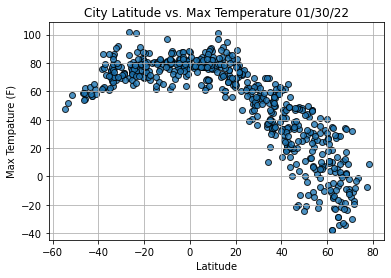

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Tempature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot
plt.show()

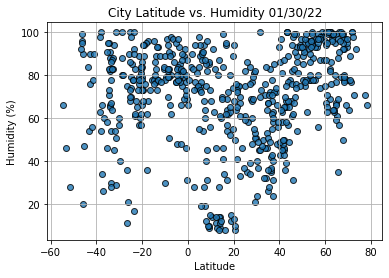

In [16]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot
plt.show()

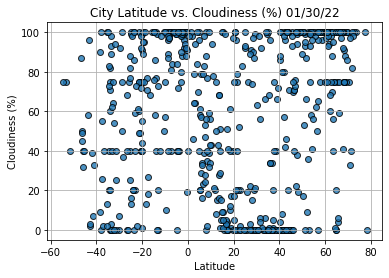

In [17]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig3.png")

# Show plot
plt.show()

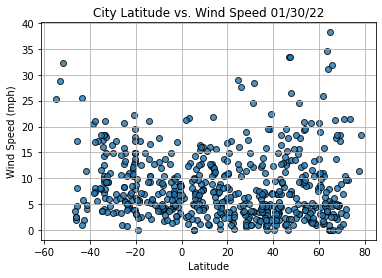

In [18]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig4.png")

# Show plot
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                          Eyl
Country                        SO
Date          2022-01-30 17:35:21
Lat                        7.9803
Lng                       49.8164
Max Temp                    75.54
Humidity                       75
Cloudiness                    100
Wind Speed                  16.44
Name: 13, dtype: object

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Leningradskiy,RU,2022-01-30 17:35:18,69.3833,178.4167,-8.90,93,100,0.51
5,Cabo San Lucas,MX,2022-01-30 17:35:19,22.8909,-109.9124,74.52,70,20,3.00
6,Norman Wells,CA,2022-01-30 17:35:19,65.2820,-126.8329,-34.56,61,75,0.00
7,Barda,AZ,2022-01-30 17:35:19,40.3744,47.1267,41.68,43,86,1.16
8,Tuktoyaktuk,CA,2022-01-30 17:34:34,69.4541,-133.0374,-2.20,78,100,18.41


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

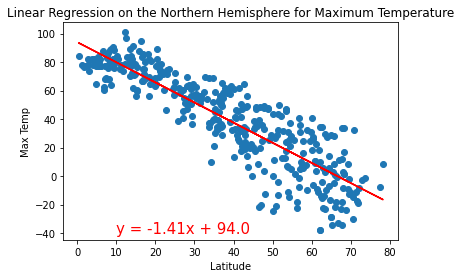

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-40))

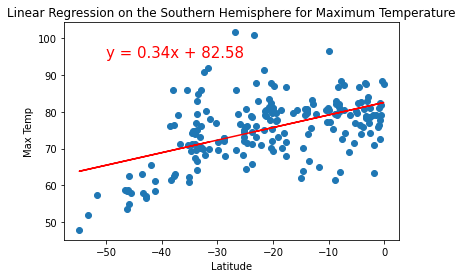

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,95))

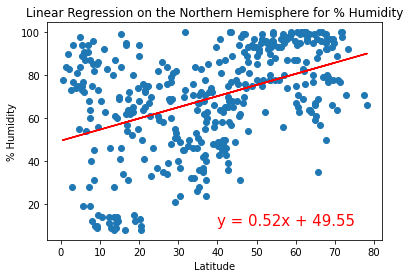

In [41]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

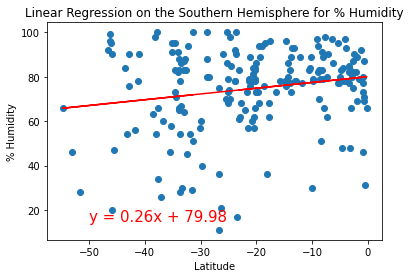

In [42]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

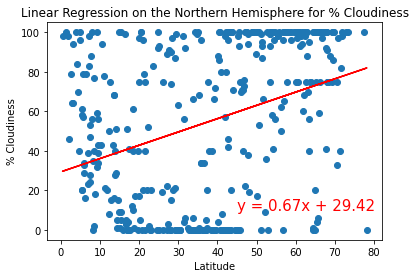

In [46]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,10))

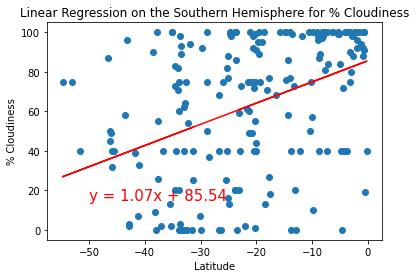

In [56]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))

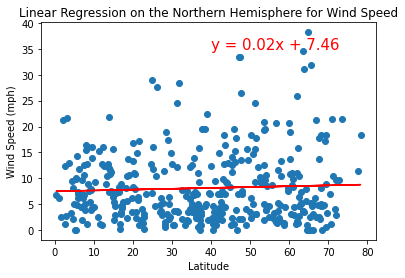

In [57]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)',(40,35))

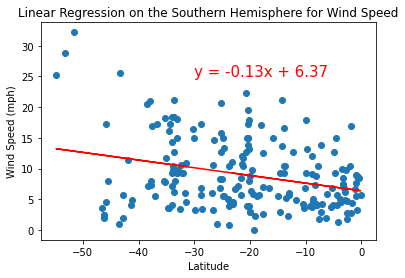

In [61]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)',(-30,25))